# Analysis of Experiment Results

In the earlier notebook (11), we have tested the parameters of Generalized Linear Model (GLM), and in this notebook we will use similar tools to compare the results of 256x256 and 512x512 datasets.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, csv

# Plot
def plot_roc_curve(metrics):
    plt.figure(figsize=(6,6))
    plt.title('Hit-Rate vs False-Positive-Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(metrics['fpr'],metrics['sensitivity'], 'o')
    plt.xlim((0, 1.))
    plt.ylim((0, 1.))
    plt.xlabel('False Positive Rate')
    plt.ylabel('Hit-Rate')
    # Add IDs
    for i in range(metrics.shape[0]):
        tmp = metrics.iloc[i,:]
        plt.annotate(tmp['id'], (tmp['fpr'], tmp['sensitivity']), size=8)
    # Wrap up
    plt.tight_layout()
    plt.show()
    return(0)

# Analyze metrics
def analyze_metrics(metrics, verbose=0):
    # Separate feature and event
    ids = metrics['id']
    # Compare events in total
    subset = metrics.loc[:,['event','feature', 'sensitivity','fpr','threat_score']]
    by_e = subset.groupby(by='event').max()
    by_f = subset.groupby(by='feature').max()
    # Loop through events
    events = list(set(metrics['event']))
    for e in events:
        tmp = metrics.loc[metrics['event']==e,
                          ['id','sensitivity','fpr','threat_score']].sort_values('sensitivity', ascending=False)
        if verbose>0:
            print(e)
            print(tmp)
    # done
    results = {'by_event':by_e.loc[:,['sensitivity','fpr','threat_score']], 
               "by_feature":by_f.loc[:,['sensitivity','fpr','threat_score']]}
    return(results)

# Summarize metrics by event
def summarize_metrics_by_event(metrics):
    # Retrieve items
    ids = metrics['id']
    events = list(set(metrics['event']))
    features = list(set(metrics['feature']))
    # Separate metrics by event
    results = {}
    subset = metrics.loc[:,['id', 'event','feature', 'sensitivity','fpr','threat_score']]
    for e in events:
        tmp = subset.loc[metrics['event']==e,:]
        results[e] = tmp.reset_index(drop=True)
    return(results)

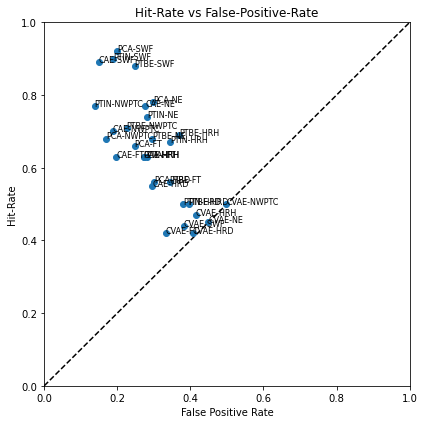

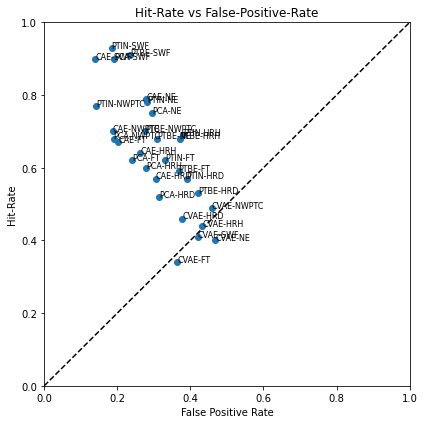

0

In [2]:
res256 = pd.read_csv("../workspace/exp256_dual_balanced_c001.csv")
plot_roc_curve(res256)
res512 = pd.read_csv("../workspace/exp512_dual_balanced_c001.csv")
plot_roc_curve(res512)

HRD


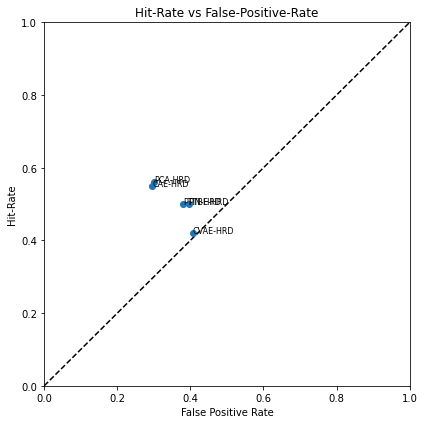

         id event feature  sensitivity     fpr  threat_score
0   PCA-HRD   HRD     PCA         0.56  0.3004        0.3196
1   CAE-HRD   HRD     CAE         0.55  0.2955        0.3162
2  CVAE-HRD   HRD    CVAE         0.42  0.4070        0.2093
3  PTBE-HRD   HRD    PTBE         0.50  0.3953        0.2500
4  PTIN-HRD   HRD    PTIN         0.50  0.3798        0.2574
NWPTC


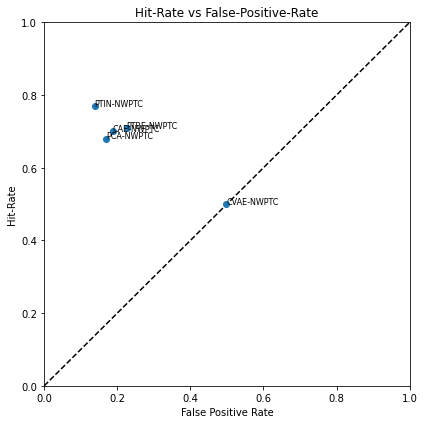

           id  event feature  sensitivity     fpr  threat_score
0   PCA-NWPTC  NWPTC     PCA         0.68  0.1700        0.5746
1   CAE-NWPTC  NWPTC     CAE         0.70  0.1871        0.5824
2  CVAE-NWPTC  NWPTC    CVAE         0.50  0.4980        0.3252
3  PTBE-NWPTC  NWPTC    PTBE         0.71  0.2253        0.5651
4  PTIN-NWPTC  NWPTC    PTIN         0.77  0.1383        0.6650
FT


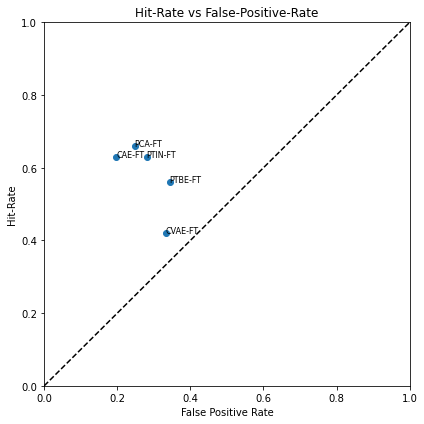

        id event feature  sensitivity     fpr  threat_score
0   PCA-FT    FT     PCA         0.66  0.2473        0.2937
1   CAE-FT    FT     CAE         0.63  0.1969        0.3145
2  CVAE-FT    FT    CVAE         0.42  0.3325        0.1576
3  PTBE-FT    FT    PTBE         0.56  0.3433        0.2034
4  PTIN-FT    FT    PTIN         0.63  0.2804        0.2595
HRH


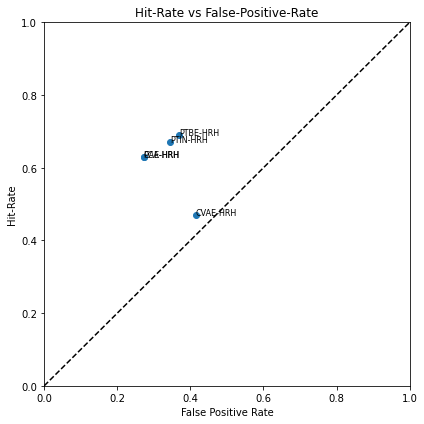

         id event feature  sensitivity     fpr  threat_score
0   PCA-HRH   HRH     PCA         0.63  0.2722        0.4187
1   CAE-HRH   HRH     CAE         0.63  0.2722        0.4200
2  CVAE-HRH   HRH    CVAE         0.47  0.4148        0.2661
3  PTBE-HRH   HRH    PTBE         0.69  0.3698        0.4151
4  PTIN-HRH   HRH    PTIN         0.67  0.3451        0.4146
SWF


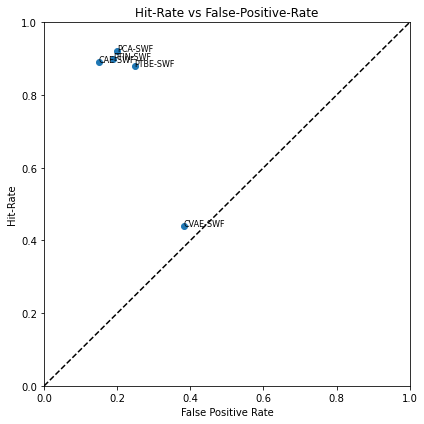

         id event feature  sensitivity     fpr  threat_score
0   PCA-SWF   SWF     PCA         0.92  0.2000        0.5977
1   CAE-SWF   SWF     CAE         0.89  0.1498        0.6370
2  CVAE-SWF   SWF    CVAE         0.44  0.3820        0.2186
3  PTBE-SWF   SWF    PTBE         0.88  0.2474        0.5260
4  PTIN-SWF   SWF    PTIN         0.90  0.1877        0.6007
NE


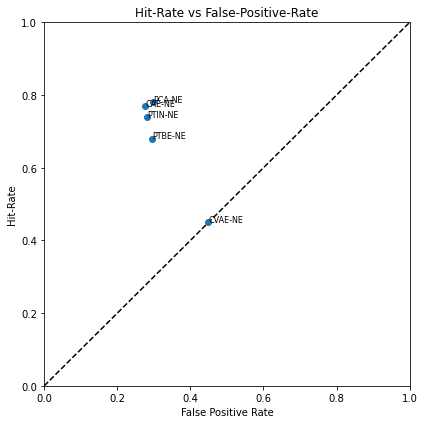

        id event feature  sensitivity     fpr  threat_score
0   PCA-NE    NE     PCA         0.78  0.2972        0.4816
1   CAE-NE    NE     CAE         0.77  0.2768        0.4878
2  CVAE-NE    NE    CVAE         0.45  0.4484        0.2313
3  PTBE-NE    NE    PTBE         0.68  0.2962        0.4177
4  PTIN-NE    NE    PTIN         0.74  0.2809        0.4677


In [3]:
summ256 = summarize_metrics_by_event(res256)
for k,v in summ256.items():
    print(k)
    plot_roc_curve(v)
    print(v)

HRD


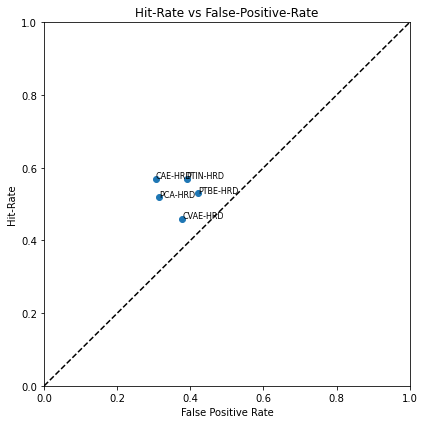

         id event feature  sensitivity     fpr  threat_score
0   PCA-HRD   HRD     PCA         0.52  0.3149        0.2928
1   CAE-HRD   HRD     CAE         0.57  0.3052        0.3242
2  CVAE-HRD   HRD    CVAE         0.46  0.3779        0.2370
3  PTBE-HRD   HRD    PTBE         0.53  0.4205        0.2600
4  PTIN-HRD   HRD    PTIN         0.57  0.3895        0.2922
NWPTC


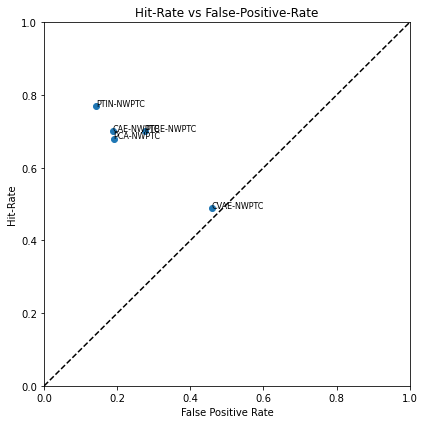

           id  event feature  sensitivity     fpr  threat_score
0   PCA-NWPTC  NWPTC     PCA         0.68  0.1897        0.5642
1   CAE-NWPTC  NWPTC     CAE         0.70  0.1871        0.5788
2  CVAE-NWPTC  NWPTC    CVAE         0.49  0.4585        0.3259
3  PTBE-NWPTC  NWPTC    PTBE         0.70  0.2767        0.5362
4  PTIN-NWPTC  NWPTC    PTIN         0.77  0.1423        0.6675
FT


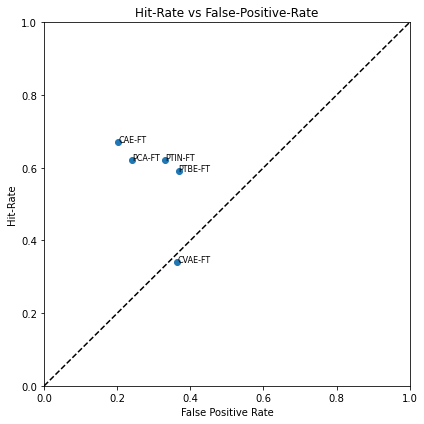

        id event feature  sensitivity     fpr  threat_score
0   PCA-FT    FT     PCA         0.62  0.2407        0.2792
1   CAE-FT    FT     CAE         0.67  0.2026        0.3285
2  CVAE-FT    FT    CVAE         0.34  0.3648        0.1206
3  PTBE-FT    FT    PTBE         0.59  0.3681        0.2061
4  PTIN-FT    FT    PTIN         0.62  0.3317        0.2312
HRH


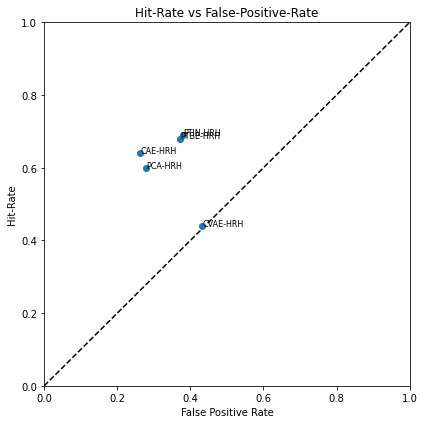

         id event feature  sensitivity     fpr  threat_score
0   PCA-HRH   HRH     PCA         0.60  0.2787        0.3974
1   CAE-HRH   HRH     CAE         0.64  0.2626        0.4329
2  CVAE-HRH   HRH    CVAE         0.44  0.4319        0.2462
3  PTBE-HRH   HRH    PTBE         0.68  0.3719        0.4060
4  PTIN-HRH   HRH    PTIN         0.69  0.3805        0.4057
SWF


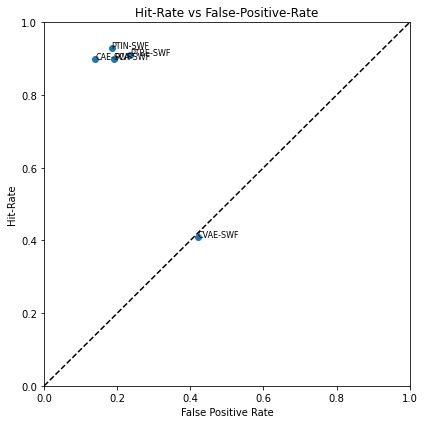

         id event feature  sensitivity     fpr  threat_score
0   PCA-SWF   SWF     PCA         0.90  0.1915        0.5966
1   CAE-SWF   SWF     CAE         0.90  0.1403        0.6506
2  CVAE-SWF   SWF    CVAE         0.41  0.4209        0.1912
3  PTBE-SWF   SWF    PTBE         0.91  0.2351        0.5585
4  PTIN-SWF   SWF    PTIN         0.93  0.1848        0.6224
NE


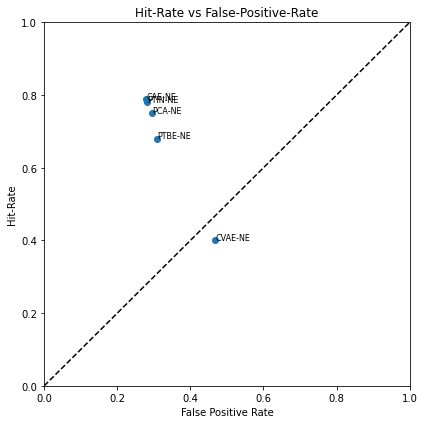

        id event feature  sensitivity     fpr  threat_score
0   PCA-NE    NE     PCA         0.75  0.2952        0.4670
1   CAE-NE    NE     CAE         0.79  0.2789        0.4973
2  CVAE-NE    NE    CVAE         0.40  0.4688        0.2004
3  PTBE-NE    NE    PTBE         0.68  0.3095        0.4145
4  PTIN-NE    NE    PTIN         0.78  0.2809        0.4906


In [4]:
summ512 = summarize_metrics_by_event(res512)
for k,v in summ512.items():
    print(k)
    plot_roc_curve(v)
    print(v)